### Publication - Comparative Analysis of Non-linear Behavior with Power Spectral Intensity Response Between Normal and Epileptic EEG Signals

PyEEG - Python module implementation for feature extraction on EEG Datasets

In [1]:
import pyeeg
import os
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
psi_set_A = {'alpha':[],'beta':[],'theta':[]}
psi_set_E = {'alpha':[],'beta':[],'theta':[]}
vector_band = [0.5,4,7,12,30,100]
fs = 50

### EEG Data Source - epileptologie-bonn.de/cms/upload/workgroup/lehnertz/eegdata.html
The database contains 5 sets of EEG signals which have been named as Set-A, Set-B, Set-C, Set-D and Set-E.

Each of the dataset has EEG signals. All the signals have been taken from 100 single channel. 

Set A was for normal healthy patient with eyes open and set B was for normal healthy patients with eyes closed. 

For set C and D Signals were measured in seizure-free intervals from five patients. In the set C the signals were measured from the hippocampus formation of the opposite hemisphere of the brain. For set D it was in the epileptogenic zone.

The last of the total dataset, set E has signals for seizure activity and these signals exhibit ictal activity.

In [3]:
for file in os.listdir('./Datasets/Z'):
    temp = open('./Datasets/Z/'+file,'r').readlines()
    data = [float(k) for k in temp]
    PSI = pyeeg.bin_power(data,vector_band,fs)
    psi_set_A['alpha'].append(PSI[0][2])
    psi_set_A['beta'].append(PSI[0][3])
    psi_set_A['theta'].append(PSI[0][1])

In [4]:
for k,v in psi_set_A.items():psi_set_A[k] = [float(i)/max(v) for i in v]
alpha_set_A = statistics.mean(psi_set_A['alpha'])
beta_set_A = statistics.mean(psi_set_A['beta'])
theta_set_A = statistics.mean(psi_set_A['theta'])

In [5]:
for file in os.listdir('./Datasets/S'):
    temp = open('./Datasets/S/'+file,'r').readlines()
    data = [float(k) for k in temp]
    PSI = pyeeg.bin_power(data,vector_band,fs)
    psi_set_E['alpha'].append(PSI[0][2])
    psi_set_E['beta'].append(PSI[0][3])
    psi_set_E['theta'].append(PSI[0][1])

In [6]:
for k,v in psi_set_E.items():psi_set_E[k] = [float(i)/max(v) for i in v]
alpha_set_E = statistics.mean(psi_set_E['alpha'])
beta_set_E = statistics.mean(psi_set_E['beta'])
theta_set_E = statistics.mean(psi_set_E['theta'])

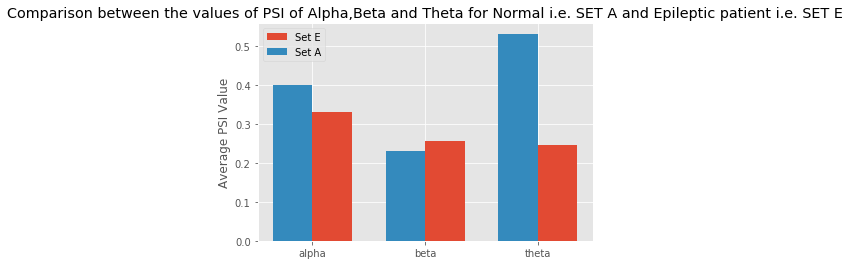

In [7]:
N = 3
set_A = (alpha_set_A, beta_set_A, theta_set_A)
set_E = (alpha_set_E, beta_set_E, theta_set_E)
ind = np.arange(N) 
width = 0.35
plt.style.use('ggplot')
plt.bar(ind + width, set_E, width,label='Set E')
plt.bar(ind, set_A, width, label='Set A')
plt.ylabel('Average PSI Value')
plt.title('Comparison between the values of PSI of Alpha,Beta and Theta for Normal i.e. SET A and Epileptic patient i.e. SET E')
plt.xticks(ind + width / 2, ('alpha', 'beta', 'theta'))
plt.legend(loc='best')
plt.savefig('psi.png')
plt.show()

### Conclusion
Thus comparison of PSI values for Alpha band, Beta band and Theta band for both the datasets has been performed by plotting bar graph. 

From this the variation of PSI values between normal and epileptic patients’ EEG signals can be easily observed. 

The value of PSI is higher in Alpha and Theta region for normal patient than epilepsy patients. 

But for the Beta region the value for normal patient is lower than that of epileptic patients.